In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import pickle
from datetime import datetime

%matplotlib inline 
%config InlineBackend.figure_format = 'retina'

In [22]:
tracker = pickle.load(open(f'tweets/tweets_tracker.txt', 'rb'))
tracker

{'california': {'max_id': 1241540334410137603,
  'downloaded': 429513,
  'tweetLocation': '36.116,-119.682,300mi'},
 'colorado': {'max_id': 1241537123749990400,
  'downloaded': 41088,
  'tweetLocation': '39.060,-105.311,200mi'},
 'florida': {'max_id': 1241548946062880768,
  'downloaded': 148567,
  'tweetLocation': '27.766,-81.687,225mi'},
 'georgia': {'max_id': 1241551890954977281,
  'downloaded': 137930,
  'tweetLocation': '32.781,-83.334,150mi'},
 'idaho': {'max_id': 1241513089557618688,
  'downloaded': 9493,
  'tweetLocation': '44.241,-114.479,200mi'},
 'illinois': {'max_id': 1241557440681910273,
  'downloaded': 190732,
  'tweetLocation': '40.350,-88.986,150mi'},
 'louisiana': {'max_id': 1241554798308216832,
  'downloaded': 73430,
  'tweetLocation': '31.170,-91.868,150mi'},
 'massachusetts': {'max_id': 1241559391960289280,
  'downloaded': 136352,
  'tweetLocation': '42.230,-71.530,100mi'},
 'newyork': {'max_id': 1241567743842947074,
  'downloaded': 430184,
  'tweetLocation': '40.700

In [19]:
df = pd.read_csv(f'tweets/tweets_processed/coronavirus_california_tweets_processed', engine = 'python')

In [27]:
df.head

,id_str,created_at,full_text,possibly_sensitive,display_text_range,favorite_count,retweet_count,character_count,hashtags_count,symbols_count,urls_count,user_mentions_count,processed_text,sentiment_distribution,sentiment
0,1241541889544708096,2020-03-22 01:47:07+00:00,Good Evening everyone! Tomorrow at 7:00 A.M. P...,NaN,"[0, 269]",0,0,269,0,0,0,0,good evening everyone tomorrow pacific standar...,"{'neg': 0.049, 'neu': 0.845, 'pos': 0.106, 'co...",0.5229


In [29]:
df['date'] = df['created_at'].apply(lambda x: datetime.strptime(x[:10], '%Y-%m-%d'))

In [37]:
dates = df.groupby(['date'])['sentiment'].mean().keys().tolist()
average_sentiment = df.groupby(['date'])['sentiment'].mean().tolist()

In [68]:
cases_df.columns

Index(['Province/State', 'Country/Region', 'Lat', 'Long', '1/22/20', '1/23/20',
       '1/24/20', '1/25/20', '1/26/20', '1/27/20', '1/28/20', '1/29/20',
       '1/30/20', '1/31/20', '2/1/20', '2/2/20', '2/3/20', '2/4/20', '2/5/20',
       '2/6/20', '2/7/20', '2/8/20', '2/9/20', '2/10/20', '2/11/20', '2/12/20',
       '2/13/20', '2/14/20', '2/15/20', '2/16/20', '2/17/20', '2/18/20',
       '2/19/20', '2/20/20', '2/21/20', '2/22/20', '2/23/20', '2/24/20',
       '2/25/20', '2/26/20', '2/27/20', '2/28/20', '2/29/20', '3/1/20',
       '3/2/20', '3/3/20', '3/4/20', '3/5/20', '3/6/20', '3/7/20', '3/8/20',
       '3/9/20', '3/10/20', '3/11/20', '3/12/20', '3/13/20', '3/14/20',
       '3/15/20', '3/16/20', '3/17/20', '3/18/20', '3/19/20', '3/20/20',
       '3/21/20', '3/22/20'],
      dtype='object')

In [44]:
cases_df = pd.read_csv(f'tweets/time_series_19-covid-Confirmed.txt', engine = 'python')

In [77]:
selected_dates = ['3/9/20', '3/10/20', '3/11/20', '3/12/20', '3/13/20', '3/14/20',
                  '3/15/20', '3/16/20', '3/17/20', '3/18/20', '3/19/20', '3/20/20',
                  '3/21/20', '3/22/20']

state_cases = cases_df[cases_df['Province/State'] == 'California']
state_cases = state_cases.iloc[:,-14:].transpose()
state_cases.columns = ['california']

In [81]:
state_cases = state_cases['california'].tolist()

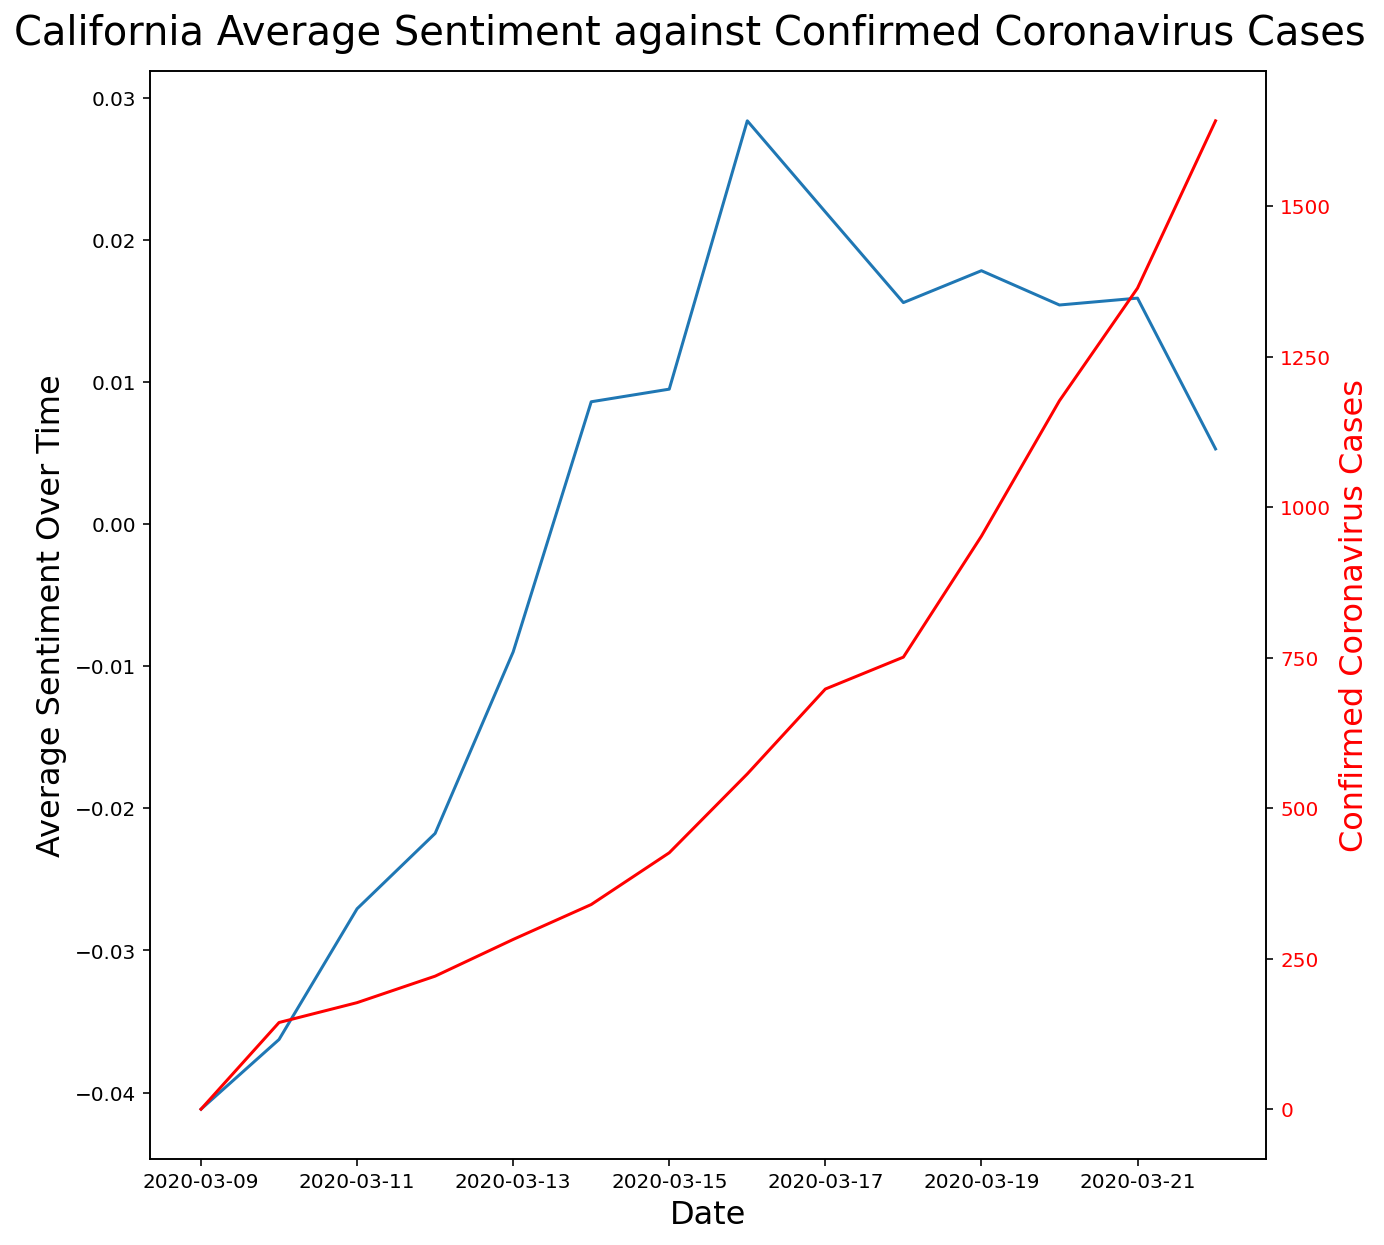

In [109]:
fig = plt.figure(figsize=(10,10))
fig.suptitle(f'California Average Sentiment against Confirmed Coronavirus Cases', fontsize=20, y=0.92)
ax1 = fig.add_subplot(111)
ax1.plot(dates, average_sentiment)
ax1.set_ylabel('Average Sentiment Over Time', fontsize=16)
ax1.set_xlabel('Date', fontsize=16)

ax2 = ax1.twinx()
ax2.plot(dates, state_cases, 'r-')
ax2.set_ylabel('Confirmed Coronavirus Cases', color='r', fontsize=16)
for t1 in ax2.get_yticklabels():
    t1.set_color('r')
    
plt.savefig('tweets/images/california_sentiment_vs_cases.png')

In [157]:
df = pd.read_csv(f'tweets/tweets_processed/coronavirus_texas_tweets_processed', engine = 'python')

In [163]:
df['created_at'].dtypes

dtype('O')

In [154]:
cases_df['Province/State'].apply(lambda x:  x.replace(' ','') if type(x) == str else False)
cases_df['Province/State'].apply(lambda x:  x.lower() if type(x) == str else False)

0      False
1      False
2      False
3      False
4      False
       ...  
482    False
483    False
484    False
485    False
486    False
Name: Province/State, Length: 487, dtype: object

In [165]:
cases_df = pd.read_csv(f'tweets/time_series_19-covid-Confirmed.txt', engine = 'python')
cases_df['Province/State'] = cases_df['Province/State'].apply(lambda x:  x.replace(' ','') if type(x) == str else False)
cases_df['Province/State'] = cases_df['Province/State'].apply(lambda x:  x.lower() if type(x) == str else False)

def graphSentimentVsCases(state):
    df = pd.read_csv(f'tweets/tweets_processed/coronavirus_{state}_tweets_processed', engine = 'python')
    df = df[df['created_at'] != '0.0'] # if a created_at timestamp is not properly done, twitter has 0.0 filled in
    df['date'] = df['created_at'].apply(lambda x: datetime.strptime(x[:10], '%Y-%m-%d') if type(x) == str else '0.0')
    df = df[df['date'] != '0.0'] # if a created_at timestamp is not properly done, twitter has 0.0 filled in
    dates = df.groupby(['date'])['sentiment'].mean().keys().tolist()
    average_sentiment = df.groupby(['date'])['sentiment'].mean().tolist()

    state_cases = cases_df[cases_df['Province/State'] == state]
    state_cases = state_cases.iloc[:,-len(dates):].transpose()
    state_cases.columns = [state]
    state_cases = state_cases[state].tolist()
    
    fig = plt.figure(figsize=(10,10))
    fig.suptitle(f'{state.capitalize()} Average Sentiment against Confirmed Coronavirus Cases', fontsize=20, y=0.92)
    ax1 = fig.add_subplot(111)
    ax1.plot(dates, average_sentiment)
    ax1.set_ylabel('Average Sentiment Over Time', fontsize=16)
    ax1.set_xlabel('Date', fontsize=16)

    ax2 = ax1.twinx()
    ax2.plot(dates, state_cases, 'r-')
    ax2.set_ylabel('Confirmed Coronavirus Cases', color='r', fontsize=16)
    for t1 in ax2.get_yticklabels():
        t1.set_color('r')

    plt.savefig(f'tweets/images/{state}_sentiment_vs_cases.png')
    print(f'Saved graph for {state}!')

Saved graph for texas!
Saved graph for washington!


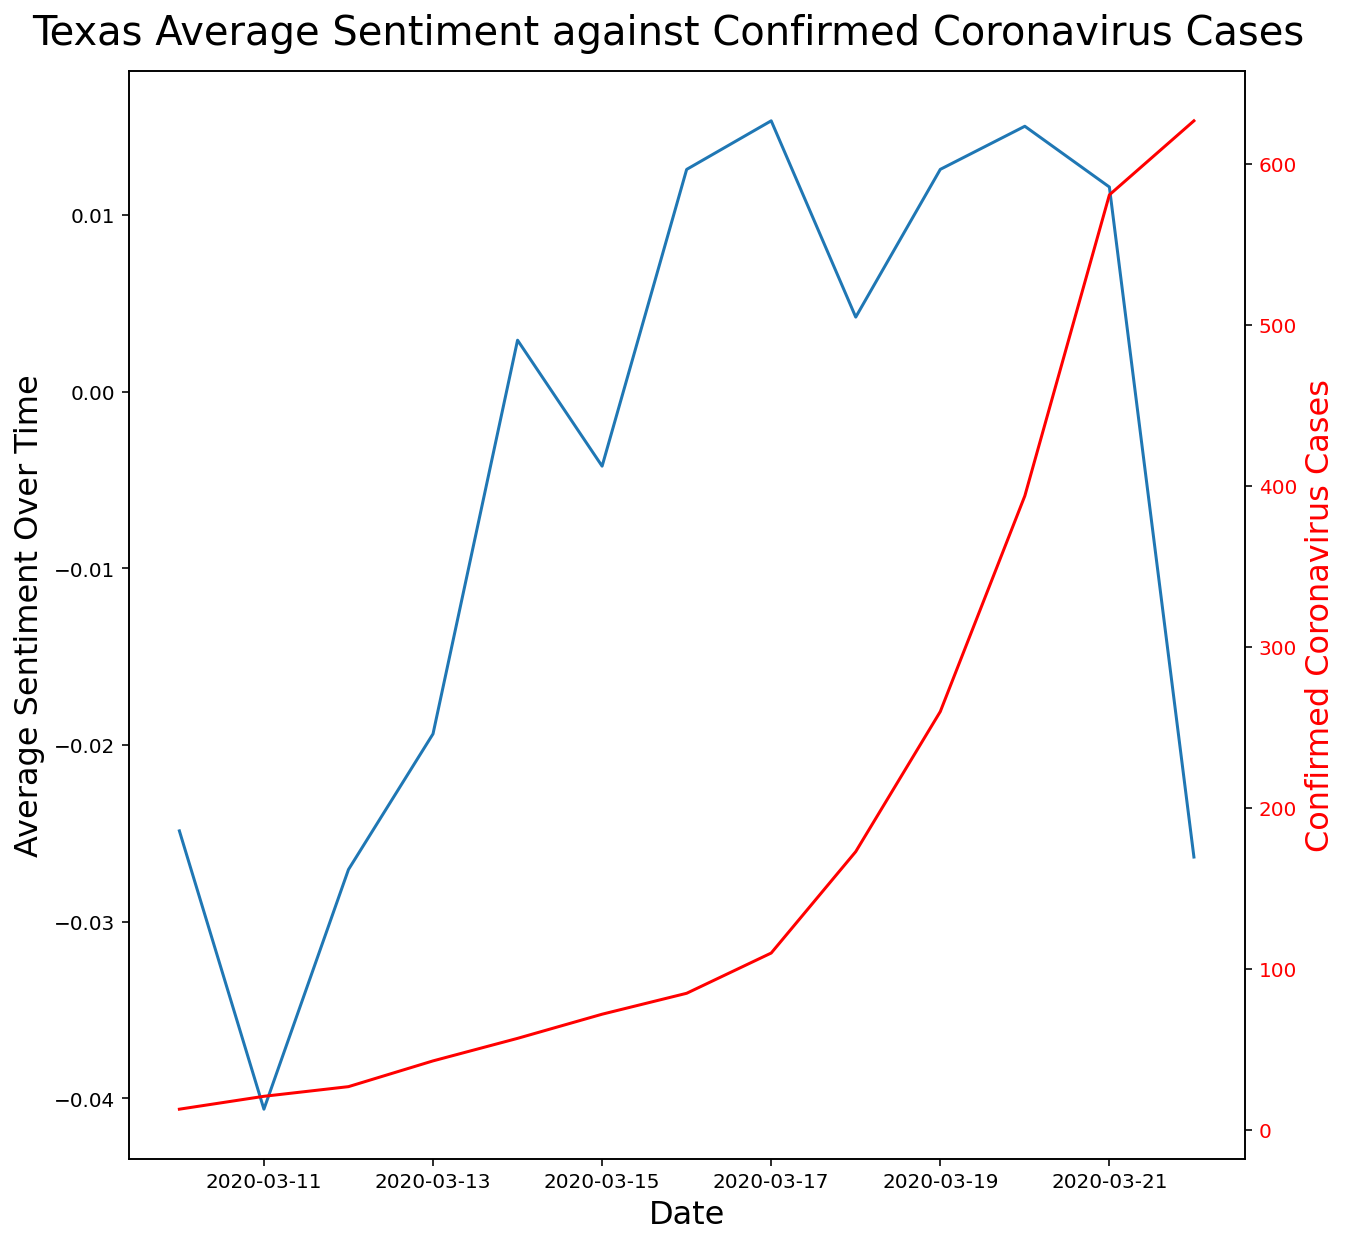

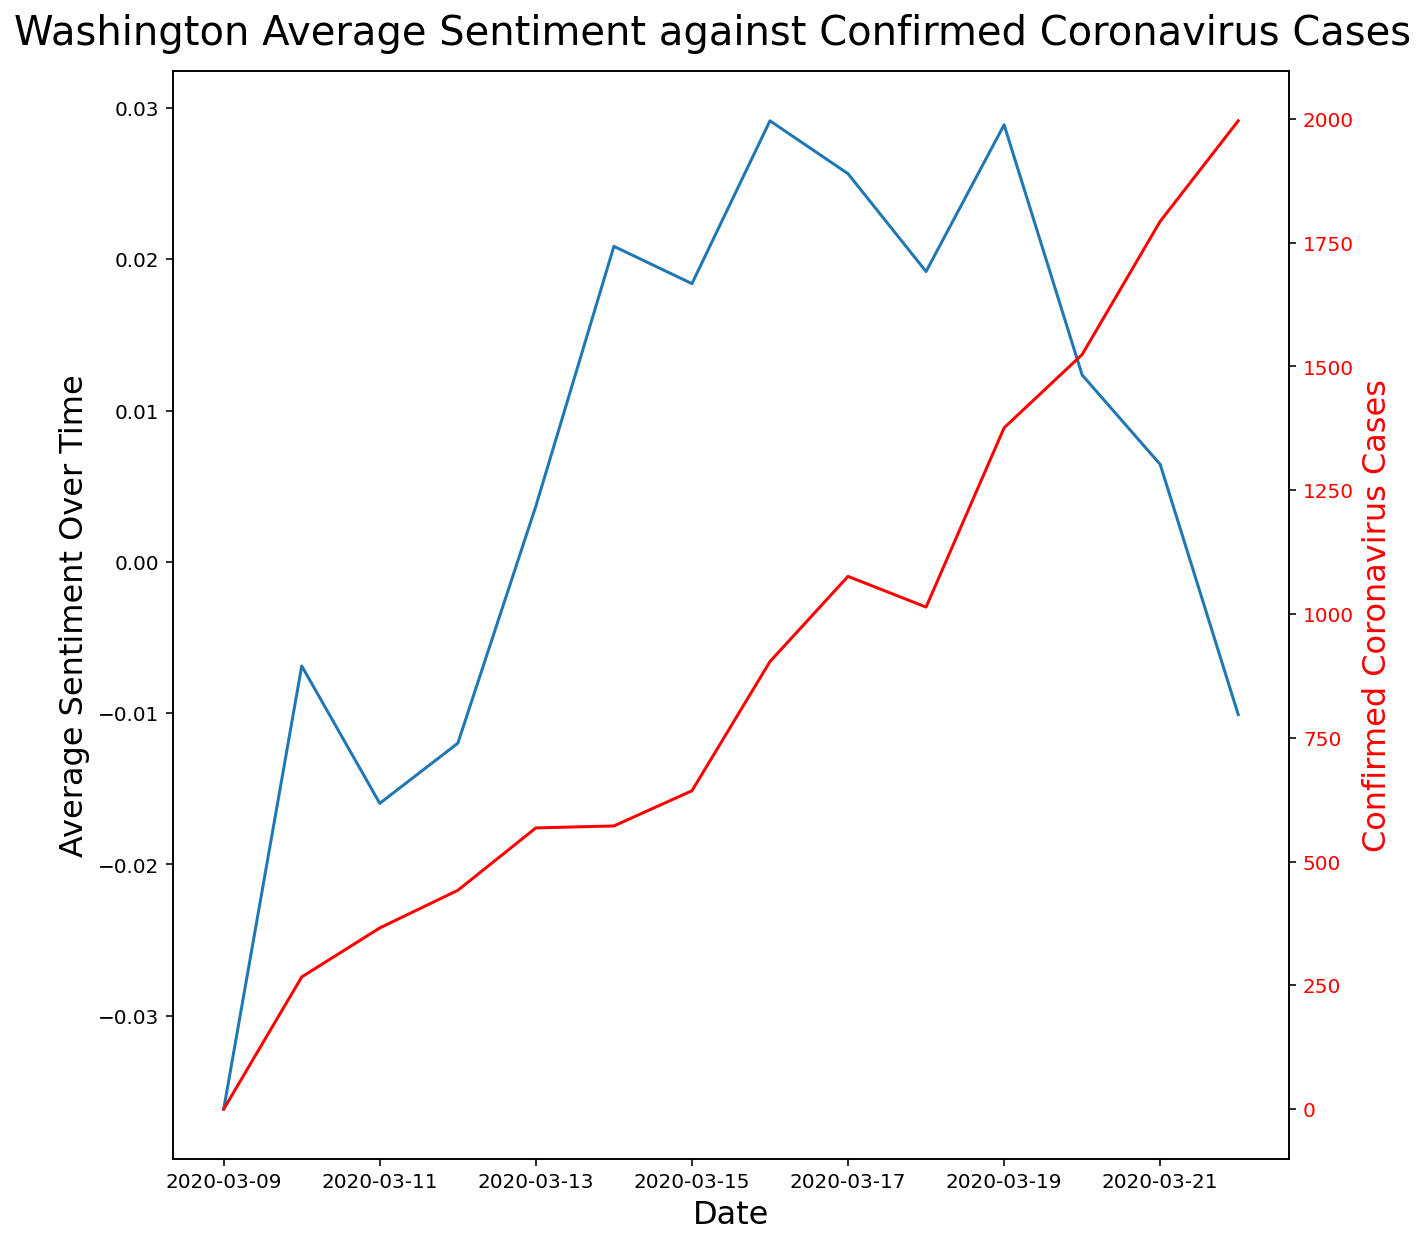

In [166]:
state_list = ['california', 'colorado', 'florida',
              'georgia', 'idaho', 'illinois',
              'louisiana', 'massachusetts', 'newyork',
              'tennessee', 'texas', 'washington']

for state in state_list:
    graphSentimentVsCases(state)

In [25]:
state = 'massachusetts'
state_topics = pickle.load(open(f'tweets/models/{state}/{state}_specific_topics.txt', 'rb'))
state_topics

{'topic0': ['charlie baker',
  'governor charlie',
  'sign petition',
  'shutdownmass minimize',
  'baker shutdownmass',
  'minimize sign',
  'gov charlie',
  'declares emergency',
  'baker declares',
  'emergency due',
  'press conference',
  'whole food',
  'jeff bezos',
  'soon gov',
  'eected soon',
  'food amp',
  'declared emergency',
  'give whole',
  'amp paid',
  'bezos give',
  'bezos bezos',
  'paid sign',
  'national guard',
  'enormous increase',
  'baker declared',
  'watch gov',
  'baker said',
  'demand immediately',
  'functional kit',
  'provided functional'],
 'topic1': ['patrick day',
  'day parade',
  'cancel patrick',
  'parade canceled',
  'amid concern',
  'amid fear',
  'parade cancelled',
  'parade amid',
  'parade postponed',
  'canceled amid',
  'parade due',
  'hartford patrick',
  'canceled due',
  'annual patrick',
  'abundance caution',
  'marty walsh',
  'saint patrick',
  'mayor marty',
  'cancelled due',
  'happy patrick',
  'postponed concern',
  'gr